#### 1.5.2 最小化期望损失

对于许多应用来说，我们的目标可能比简单最小化误分类数目要复杂的多。让我们再来考虑医疗诊断问题。我们注意到，如果一个病人没有得癌症，却被错误诊断为得了癌症，因此这可能会对以后的诊断产生误导。反之，如果一个病人有癌症，被诊断为是正常的，结果可能会因为缺少正确对待而导致早死。因此对于这两种类型的误操作问题，可能会有戏剧性的结果。所以显然最好我们对于第二种情况能够尽量减少，尽管对于第一种情况产生的误操作的代价会很高。

我们会通过介绍损失函数，或者成本函数来形式化这样的问题，这是对采取所有有用的决策或行动的一个单一，全面的损失度量。我们的目标是最小化总损失。注意，有些作者可能会将其看做是实用函数，他们的目标是最大化该值。如果我们将实用函数简单地区负号损失，它们也就是等价的概念，而在本节中我们为了方便就使用损失函数。假设，对于一个新输入值$\mathbf{x}$，正确类别是$\mathcal{C}_k$，我们将$\mathbf{x}$分配给类别$\mathcal{C}_j$（而$j$可能或并不等于$k$）。如果是这样的话，我们会得到一些损失表示成$L_{kj}$，这可以看成是有着$k,j$个元素的损失矩阵。例如，在我们的癌症例子中，我们会有如图1.25这样的损失矩阵。这个特别的损失矩阵如果做了正确的决策的话，也就不糊有损失，如果健康的病人被诊断为得了癌症，那就会有1个损失，如果病人有癌症却被诊断为是健康的，则有1000的损失。

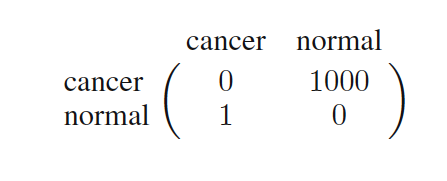

<center>图1.25 损失矩阵例子中元素$L_{kj}$为癌症处理的例子。行表示的是真确类别，而列表示的我们的决策标准分配的类别。</center>

一种最优化的方法就是最小化损失函数。但是，损失函数依赖于真实类别，它一般是未知的。对于一个给定的输入向量$\mathbf{x}$，在真实类别中的不确定性是通过联合概率分布$p(\mathbf{x},\mathcal{C}_k)$表示的，而我们期望来替代最小化平均损失，而这里的平均是通过分布来计算，如下给出

$$\mathbb{E}[L] = \sum_k\sum_j\int_{\mathcal{R}_j}L_{kj}p(\mathbf{x},\mathcal{C}_k)d\mathbf{x}$$

>说明：这里的每个类别都会有一个分布，而对于每个类别都会有针对每个$x$的误分类损失。

每个$\mathbf{x}$可以独立分配给决策区域$\mathcal{R}_j$中的一个。我们的目标是选择区域$\mathcal{R}_j$为了最小化1.80中的期望损失，这就意味着对于每个$\mathbf{x}$我们会最小化$\sum_kL_{kj}p(\mathbf{x},\mathcal{C}_k)$。正如之前提到的，我们可以使用乘法规则$p(\mathbf{x},\mathcal{R}_k)=p(\mathcal{C}_k \mid \mathbf{x})p(\mathbf{x})$来评估有着共同乘子$p(\mathbf{x})$。因此决策规则是最小化期望损失，它是对每个新的$\mathbf{x}$分配类别$j$的量

$$\sum_kL_{kj}p(\mathcal{C_k \mid \mathbf{x}})$$

是一个最小值。这显然很容易做到，只要我们知道了类别概率的后验$p(\mathcal{C}_k \mid \mathbf{x})$。

#### 1.5.3 拒绝选项

我们看到错误分类的产生源自输入空间它的最大的后验概率$p(\mathcal{C}_k \mid \mathbf{x})$明显少于标准，或者等价来说联合概率$p(\mathbf{x},\mathcal{C}_k)$具有可比值。也会有一些区域我们可能并不知道它的类别。在一些应用中，在对低错误率的例子做出决策这样的例子我们应该避免，这也是合理的。这就是拒绝选项。比如，在我们的假设医疗示意图中，使用自动化系统来对X光图像只有很少怀疑的图像做出正确的类别判断，而让人类专家来对更加异常的例子来决策，这是合理的。这里我们通过引入一个阈值$\theta$来得到这个，拒绝某些输入$\mathbf{x}$它有着较大的后验概率$p(\mathcal{C}_k \mid \mathbf{x})$但小于等于阈值$\theta$。正如图1.26中画的二分类例子，是一个单变量连续输入变量$x$。需要注意的是设置$\theta=1$可以确保所有的样本都会被拒绝，而如果有$K$个类别。那么设置$\theta < 1/K$可以确保没有任何样本会被拒绝。因此样本的分数会在$\theta$值的控制下是否被拒绝。

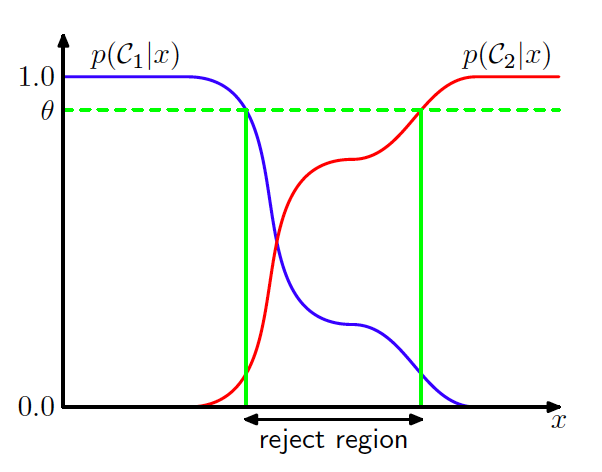

<center>图1.26 图中画的是拒绝选项。输入$x$在两个后验概率大的那个如果小于等于阈值$\theta$将会被拒绝。</center>

我们可以很容易地将拒绝标准扩展到最小化期望损失中，当给定一个损失矩阵，当做出一个拒绝决策时，就会有损失的发生。

#### 1.5.4 推断和决策

我们已经将分类问题凤城两个独立的部分，推断部分我们使用训练数据来学习一个$p(\mathcal{C}_k \mid \mathbf{x})$的模型，在后续的决策阶段我们使用这些后验概率来做出最优的类别分配。一个可替代的概率会同时解决这两个问题，简单地学得一个能将输入$\mathbf{x}$直接映射到决策的函数。这个函数称作为判别函数。

事实上，我们可以有三种不同的方法来解决决策问题，所有这些都已经用在了实践应用中。下面这些都是以降低复杂性的顺序给出的：

(a) 首先解决了确定每个类别的条件密度$p(\mathbf{x} \mid \mathcal{C}_k)$的推断问题。同样先要推断先验条件概率$p(\mathcal{C}_k)$。那么使用如下贝叶斯定理

$$p(\mathcal{C}_k \mid \mathbf{x}) = \frac{p(\mathbf{x} \mid \mathcal{C}_k)p(\mathcal{C}_k)}{p(\mathbf{x})}$$

来找到后验条件概率$p(\mathcal{C}_k \mid \mathbf{x})$。和之前一样，贝叶斯定理中的分母可以用分子中出现的量来表示

$$p(\mathbf{x}) = \sum_kp(\mathbf{x} \mid \mathcal{C}_k)p(\mathbf{x})$$

等价地，我们可以直接建模联合分布$p(\mathbf{x},\mathcal{C}_k)$，然后标准化得到后验概率。找到后验分布后，我们使用决策理论来定义每个新输入$\mathbf{x}$的所属于的成员类别。对输入和输出的分布进行显示或隐式建模的方法称为生成模型，因为通过从中取样，可以再输入空间中生成合成数据点。

(b) 首先解决定义后验条件概率$p(\mathbf{x} \mid \mathcal{C}_k)$的推断问题，然后后续使用决策理论给每个新的$\mathbf{x}$分配一个类别。这种直接建模后验概率的方法称为判别模型。

(c) 找一个函数$f(\mathbf{x})$，叫做判别函数，它可以直接映射每个输入$\mathbf{x}$到类别标签。比如，在二分类问题的例子中，$f(\cdot)$是一个二进制值，$f=0$表示的是类别$\mathcal{C}_1$，$f=1$代表的类别$\mathcal{C}_2$。在这个例子中，概率没什么用。

让我们考虑一下这三个备选方案的相应的优点。方法(a)是大多数的选择，因为它涉及在$\mathbf{x}$和$\mathcal{C}_k$上的联合分布。对于很多应用来说，$\mathbf{x}$可能会是一个高维度，因此我们需要一个大的训练集来定义条件概率密度达到合理的准确度。需要注意的是类别先验$p(\mathcal{C}_k)$可以简单地从训练数据集点每个类别中进行评估。方法(a)的一个优势，然而，它允许从1.83确定数据$p(\mathbf{x})$的边缘密度。这对于定义有着较低概率模型和第精度预测的新数据点的检测非常有用，这被称为异常检测（Bishop，1994；Tarasenko，1995年）。

但如果我们只是希望做出分类决策，这可能会浪费计算资源，而对于数据的过分需求，为了找到联合概率分布$p(\mathbf{x}, \mathcal{C}_k)$，而事实上我们需要后验概率$p(\mathcal{C}_k \mid \mathbf{x})$，这可以直接通过方法(b)得到。事实上，类条件密度可能会包含许多对后验概率影响不大的结构，如图1.27所示。在探索机器学习中的生成和班别方法也会非常有趣，还有就是想办法将两者结合（2004年，JeBara；Lastor等人，2006年）。

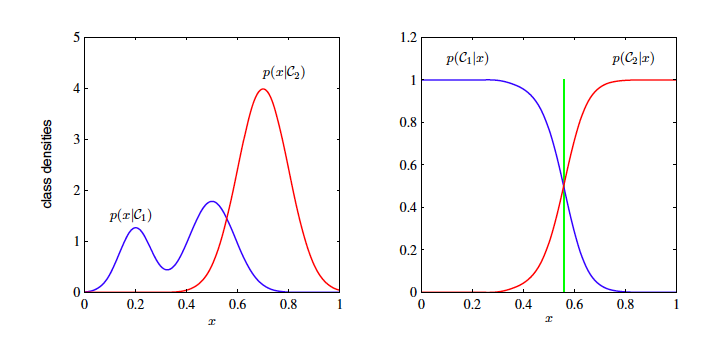

<center>图1.27 有着单个输入$x$值（左图），与对应的后验概率（右图），的二分类条件密度的例子。需要注意的是左手边是类条件密度$p(\mathbf{x} \mid \mathcal{C}_1)$，以左图中的蓝色表示，对后验概率没有影响。右图中的绿色垂直线表示的给出的是最小误分类率下的决策边界。</center>

一个甚至更简单的方法(c)我们使用训练数据得到判别函数$f(\mathbf{x})$，它将每个$\mathbf{x}$直接映射到类别标签，从而将推断和决策两者结合成一个单学习问题。在图1.27的例子中，这绿色垂直线表示的找到的$x$值，它是误分类的最小概率对应的决策边界。

对于选项(c)，我们并不再使用后验概率$p(\mathcal{C}_k \mid \mathbf{x})$。我们有很多理由需要计算后验概率，后续我们也会用它们来进行决策。这些包括：

**最小化风险。** 考虑这样一个问题损失矩阵中的元素会时刻发生变化（这可能会发生在经济应用中）。如果我们知道后验概率，我们会适当地修正1.81中的最小化风险决策标准。如果我们只有判别函数，任何对于损失矩阵的改变需要我们回到训练数据中，来重新审视分类问题的解决。

**拒绝选项。** 后验概率允许我们定义一个拒绝标准，对于一个给定的被拒绝的数据点，它可以最小化误分类率，或者更通用的期望损失。

**补偿类先验。** 为了创建一个自动化筛选系统，再次考虑我们的医疗X光的问题，假设我们从普通人群中收集了大量的X光照片作为训练数据。在普通人群中很少有人得癌症，我们可能会发现，也就是说，在每1000个人种只有1例得癌症。如果我们使用这样的数据集训练一个合适的模型，由于得癌症的比例较少，我们可能会遇到运行困难的问题。比如，一个分类器它对于正常类别的分类达到了99.9%的比例，这样的问题就很难找到合适的解决办法。同样的，在一个大的数据集中包含的得癌症的X光的图像示例也会很少，那么学习算法也很难在这类图像中学到有用信息，所以学到的生成模型可能也不会很好。一个平衡的数据集中我们得到的类别数据都是几乎相等的，它得到的模型也较精确。所以，我们必须补偿我们对训练数据的修改带来的影响。假设我们已经使用了这样修改过的数据，找到后验概率的模型。从1.82中贝叶斯定理，我看到后验概率是与先验概率成比例，先验概率可以解释为每个类别数据点的分数。我们因此可以简单从后验概率中获得我们人工设定的平衡数据集。先除以在数据集中的类分数，然后再乘以我们希望应用模型的总体类分数。最终，我们需要确保新的后验概率和为1。需要注意的是，如果我们学习到的是判别函数而不是确定后验概率，则不能使用该程序。

**模型组合。** 对于复杂应用，我们可能希望将问题划分成多个小的子问题，每个子问题都可以单独处理。比如，在我们的假设医学诊断问题中，我们可以说成从血液测试和X光照片中获得有用的信息。而不是将所有这些异构信息组成一个大的输入空间，可能我们见一个系统来解释X光照片，另一个不同解释血液数据，更有效。只要两个模型中的每一个给出类的后验概率，我们可以系统地使用概率规则来组合这些输出。这样做的一个简单的方法就是假定，对于每个独立的类别，X光图像的输入分布，用$\mathbf{x}_I$表示，血液数据，用$\mathbf{x}_B$表示，它们是相互独立的，所以

$$p(\mathbf{x}_I, \mathbf{x}_B \mid \mathcal{C}_k) = p(\mathbf{x}_I \mid \mathcal{C}_k)p(\mathbf{x}_B \mid \mathcal{C}_k)$$

这个例子就是条件独立性质，因为当每个类别以$\mathcal{C}_k$为分布时，条件独立成立。以下给出了X光和血液数据的后验概率

$$\begin{align*}p(\mathcal{C}_k \mid \mathbf{x}_I, \mathbf{x}_B) &\propto p(\mathbf{x}_I, \mathbf{x}_B \mid \mathcal{C}_k)p(\mathcal{C}_k) \\
&\propto p(\mathbf{x}_I \mid \mathcal{C}_k)p(\mathbf{x}_B \mid \mathcal{C}_k)p(\mathcal{C}_k) \\
&\propto \frac{\propto p(\mathbf{x}_I \mid \mathcal{C}_k)p(\mathbf{x}_B \mid \mathcal{C}_k)}{p(\mathcal{C}_k)}
\end{align*}$$

因此我们需要类先验概率$p(\mathcal{C}_k)$，我们可以很容易从每个类别中评估数据点的分数，然后我们需要标准化结果狗眼概率使得它们的和为1。1.84中的特别的独立性假设，他就是朴素贝叶斯模型的例子。需要注意的是联合边缘分布$p(\mathbf{x}_I, \mathbf{x}_B)$通常不会再这个模型下分解。我们将在后面的章节中简单到如何构建不需要条件独立性假设的组合数据的模型。

#### 1.5.5 回归损失函数

迄今为止，我们讨论了在分类问题中的决策理论。我们现在转到回归问题的讨论，比如之前讨论的曲线拟合例子。决策阶段包含对于每个输入$\mathbf{x}$，选定一个$t$值特定的评估$y(\mathbf{x})$。如果这样做的话，我们会得到一个损失$L(t,y(\mathbf{x}))$。损失的均值，或期望如下给出

$$\mathbb{E}[L] = \iint L(t,y(\mathbf{x}))p(\mathbf{x},t)d\mathbf{x}dt$$

在回归问题中损失函数的通常选择，是使用如下$L(t,y(\mathbf{x}))=\left\{y(\mathbf{x}-t)\right\}^2$给出的平方损失。在这个例子中，期望损失可以写成如下形式

$$\mathbb{E}[L]=\iint\left\{y(\mathbf{x}-t)\right\}^2p(\mathbf{x},t)d\mathbf{x}dt$$

我们的目标是选定$y(\mathbf{x})$来最小化$\mathbb{E}[L]$。如果我们有一个灵活而完整的函数$y(\mathbf{x})$，我们可以如下正式对变量求导得到

$$\frac{\delta\mathbb{E}[L]}{\delta y(\mathbf{x})} = 2 \int\left\{y(\mathbf{x})-t\right\}p(\mathbf{x},t)dt = 0$$

$y(\mathbf{x})$的解，使用概率加和和乘积规则，我们得到如下

$$y(\mathbf{x}) = \frac{\int t p(\mathbf{x},t)dt}{p(\mathbf{x})} = \int t p(t \mid \mathbf{x})dt = \mathbb{E}_t[t \mid \mathbf{x}]$$

它是在条件$\mathbf{x}$上的条件均值$t$，被称为回归函数。这个结果如图1.28所示。它也可以很自然地扩展到多目标变量，用向量$\mathbf{t}$表示，它的条件均值的最优解是$\mathbf{y}(\mathbf{x}) = \mathbb{E}_t[\mathbf{t} \mid \mathbf{x}]$。

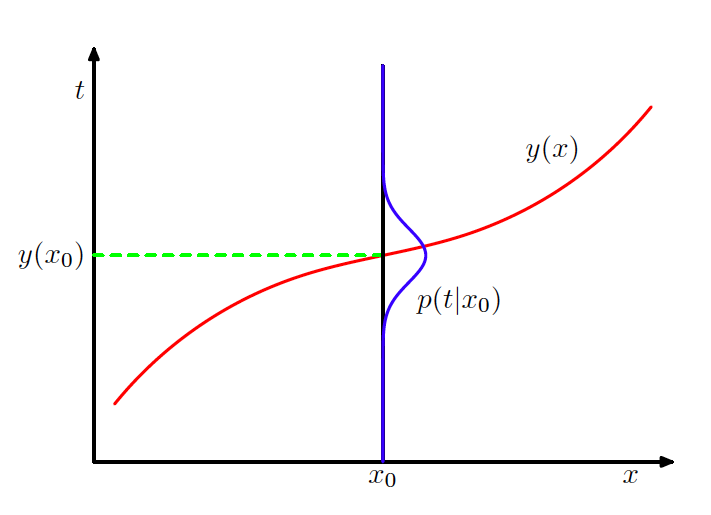

<center>图1.28 回归函数$y(x)$，它的最小化期望平方损失，如条件分布$p(t \mid x)$给出的。</center>

我们也可以另一种方式来得到这个结果，这也将揭示回归问题的本质。掌握了条件期望最优解的知识，我们将平方项如下展开

$$\begin{align*}\{y(\mathbf{x})-t\}^2 &= \{y(\mathbf{x}) - \mathbb{E}[t\mid\mathbf{x}] + \mathbb{E}[t\mid\mathbf{x}] -t\}^2 \\
&=\{y(\mathbf{x}) - \mathbb{E}[t\mid\mathbf{x}]\}^2 + 2\{y(\mathbf{x}) - \mathbb{E}[t\mid\mathbf{x}]\}\{{\mathbb{E}[t\mid\mathbf{x}] - t}\} + \{\mathbb{E}[t\mid\mathbf{x}] - t\}^2
\end{align*}$$

这里，为了保持符号整洁，我们使用$\mathbb{E}[t\mid\mathbf{x}]$代替$\mathbb{E}_t[t\mid\mathbf{x}]$。带入到损失函数和对$t$进行积分操作，我们看到交叉项消失了，我们得到一个损失函数的表达式

$$\mathbb{E}[L] = \int\{y(\mathbf{x}) - \mathbb{E}[t\mid\mathbf{x}]\}^2p(\mathbf{x})d\mathbf{x} + \int\{\mathbb{E}[t\mid\mathbf{x}] - t\}^2p(\mathbf{x})d\mathbf{x}$$

我们所找函数$y(\mathbf{x})$用来定义只在第一项中，当最小化使得$y(\mathbf{x})$等于$\mathbb{E}[t\mid\mathbf{x}]$，那这项将会消失。这个简单的结果是我们之前推导的，它表明最优最小二乘预测值是由条件平均值给出的。第二项是在$\mathbf{x}$上方差$t$的分布。它表示的实际目标数据存在内在变化，可以认为是噪声。因为$y(\mathbf{x})$的独立性，它代表的损失函数的不能简化的最小值。

如分类问题的那样，我们要么定义一个合理的概率，然后用这些来做出最优决策，要么我们直接构建模型来决策。事实上，我们也可以使用三种不同的方法来解决回归问题，为了降低复杂性，如下：

(a) 首先解决定义联合密度$p(\mathbf{x},t)$的推断问题。然后标准化找到的条件密度$p(t \mid \mathbf{x})$，最后边缘化找到1.89中的条件均值。

(b) 首先解决定义条件密度$p(t \mid \mathbf{x})$的推断问题，然后边缘化找到的1.89中的条件均值。

(c) 直接从训练数据数据找到回归函数$y(\mathbf{x})$。

相应的三种方法的优点也和上面说的分类问题一样。

平方损失并不是回归损失函数的唯一选择。事实上，有很多情形平方损失会导致一个差的结果的，那我们就需要开发出更加有意义的方法。一个重要的例子，涉及的条件分布是多模态的情况，这在逆向问题中经常出现。这里我们考虑大致考虑一个简单的平方损失的泛化，叫做Minkowski损失，它的期望如下

$$\mathbb{E}[L_q] = \iint\mid y(\mathbf{x})-t\mid^qp(\mathbf{x},t)d\mathbf{x}dt$$

当$q=2$时降为期望平方损失。函数$|y-t|^q$如图中1.29中$y-t$的各种$q$值。当$q=2$时，它是最小化$\mathbb{E}[L_q]$的条件均值，$q=1$是条件中位数，$q \to 0$是条件众数。

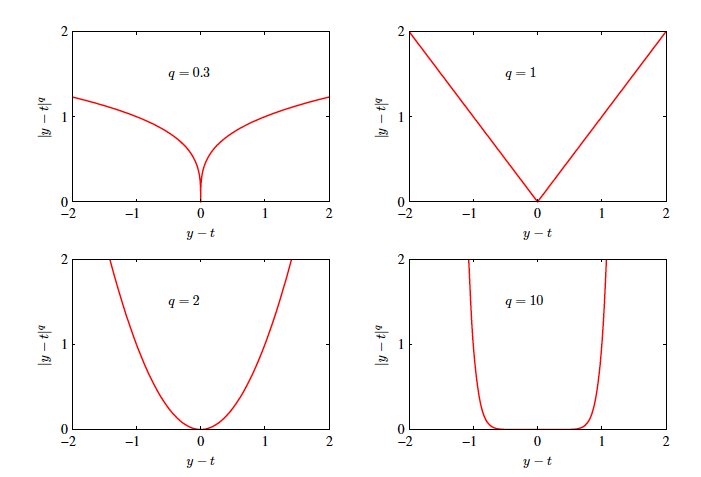

<center>图1.29 图中绘制的是各种$q$值对应的$L_q=|y-t|^q$。</center>

#### 1.6 信息论

在本章中，我们已经讨论了概率论和决策论的多种概念，而这些将成为本书后续讨论的基石。我们将以介绍一些额外的信息论利于的内容来结束本章，这在我们的模式识别和机器学习技术的研究中被证明也是有用的。同样的，我们也只是聚焦部分关键内容，我们也会参考的大部分读者所讨论的一些细节（Viterbi和Omura，1979年；Cover和Thomas，1991年；Mackay，2003年）。

我们先来考虑一个离散随机变量$x$，如果问当我们观测到这个变量的指定值时，它收到的信息是多少。在学习$x$值上信息量可以看做是"惊喜程度"。如果我们被告知一个不可能的事件要发生了，我们收到的信息将多于，被告知很大可能会发生的事件发生额，如果我们知道事件确定会发生，，那么我们不会收到任何信息。我们的信息的度量将依赖于概率分布$p(x)$，我们因此会找一个量$h(x)$，它是概率$p(x)$的单调函数，能够表达信息的内容。通过$h(\cdot)$的形式我们可以注意到，如果有两个不相干的事件$x$和$y$，那么光差这两个事件中获得的信息应该分别是从每个事件中获得信息的总和，所以有$h(x,y)=h(x)+h(y)$。两个不相干的事件在统计上也是独立的，所以有$p(x,y)=p(x)p(y)$。从这两者的关系汇总，很容易使用对数$p(x)$来表示$h(x)$，所以我们有

$$h(x)=-\log_2p(x)$$

这里的负号是确保信息是正的，或为0.需要注意的是第概率事件$x$会有高的信息量。对于对数底的选择也是任意的，此时为了方便我们一般采用信息论中通用的以2为底的岁数。在这个例子中，正如我们看到的，$h(x)$的基本单位是比特（'二进制数字'）。

现在假设有一个发送者希望传输一个随机变量的值给接受者。在这个过程中他们要传输信息的平均量如1.92中的取期望得到，如下分布$p(x)$的期望

$$H[x] = -\sum_xp(x)\log_2p(x)$$

这个重要的量我们成为随机变量$x$的熵。需要注意的是$\lim_{p \to 0}p \ln p = 0$，所以当我们有一个$x$值，其$p(x)=0$时，我们取$p(x) \ln p(x) = 0$。

迄今为止，我们已经有了启发式动机来定义1.92中的信息，和它相应的熵(1.93)。我们现在要展示的是这些定义一些必要的有用特性。考虑一个随机变量$x$有8个可能的状态，每个都几乎是等价的。为了与发送者交流$x$的值，我们需要传输至少3个比特的信息。需要注意的是这个变量的熵如下给出

$$H[x] = -8 \times \frac{1}{8}\log_2\frac{1}{8} = 3\text{bits}$$

现在考虑有着8种可能状态$\{a,b,c,d,e,f,g,h\}$的变量的例子（Cover和Thomas 1991年），它们相应的概率为（$\frac{1}{2},\frac{1}{4},\frac{1}{8},\frac{1}{16},\frac{1}{64},\frac{1}{64},\frac{1}{64},\frac{1}{64}$）。这个例子中的信息熵如下

$$H[x] = -\frac{1}{2}\log_2\frac{1}{2}-\frac{1}{4}\log_2\frac{1}{4}-\frac{1}{8}\log_2\frac{1}{8}-\frac{1}{16}\log_2\frac{1}{16}-\frac{4}{64}\log_2\frac{1}{64} = 2 \text{bits}$$

我们看到非均匀分布有着比均匀分布更小的熵，当我们讨论关于无序熵的解释时，将很快有所了解。现在，让我们考虑如何将识别的变量状态传输给接受者的。我们会这样做，在之前，我们有3个比特的数字。然而，我们可以利用非均匀分布的优点，用较短的代码表示更可能发生的事件，是以牺牲较长代码表示可能性较小的事件的，以期获得较短的平均代码长度。这可以通过表示状态$\{a, b, c, d, e, f, g, h\}$来实现，例如，下面这些代码字符串：0, 10, 110, 1110, 111100, 111101, 111110, 111111。需要传输的平均代码长度是

$$\text{average code length} = \frac{1}{2} \times 1 + \frac{1}{4} \times 2 + \frac{1}{8} \times 3 + \frac{1}{16} \times 4 + 4 \times \frac{1}{64} \times 6 = 2\text{bits}$$

这与随机变量的熵相同。需要注意的是不能使用短码字符串，是因为必须消除类似字符串成为其组成的部分的可能。比如，11001110解码成的唯一状态序列$c, a, d$。

熵与最短编码长度之间的这种关系是很一般的。无噪声编码理论（香农，1948年）指出关于传输随机变量状态所需的位数的下界。

从现在开始我们转到在定义熵时自然对对数的使用，这也将提供一个与本书其它内容的更方便的衔接。在这个例子中，熵使用"nats"来代替bits作为测量的基本单位，不同的地方就是使用了$\ln_2$。

我们已经指定随机变量状态所需的平均信息量引入了熵的概念。实际上，熵的概念在物理学上有较早的起源，在平衡热力学中有引入，后来通过统计力学的发展实现无序化给出了衡量标准的更深层次的解释。我们可以通过考虑有一组$N$个相同对象，将其分成一组bins，每个bins里有$n_i$个物体，来理解熵的替代视图。考虑到有着不同的分配对象到bins的方法。对于第一个对象有着$N$种方法，第二个对象有$N-1$方法，等等，这使得共有$N!$种方法来分配所有$N$个对象到bins，这里$N!$（发音'$N$的阶乘'）表示是$N \time (N-1) \times \cdots \times x 2 \times 1$。但是，我们并不需要去区分每个bin中它是怎么安排对象的。第$i^{\text{th}}$bin有$n_i!$种排序方式，所以分配$N$个对象到bins的方法如下

$$W = \frac{N!}{\prod_i n_i!}$$

这被称为多重性。熵然后被定义成缩放成合适常数的对数多重性来定义

$$H=\frac{1}{N}\ln W = \frac{1}{N} \ln N! = \frac{1}{N} \sum_i \ln n_i$$

现在我们考虑极限$N \to ∞$，其中$n_i/N$保持固定，然后应用斯特林近似

$$\ln N \simeq N \ln N - N$$

这里给出

$$H = - \lim_{N \to ∞} \sum_i \bigr(\frac{n_i}{N}\bigr)\ln\bigr(\frac{n_i}{N}\bigr) = - \sum_i p_i \ln p_i$$

其中我们有$\sum_in_i=N$。这里$p_i = \lim_{N\to∞}(n_i/N)$是一个对象分配给第$i_{\text{th}}$bin的概率。在物理学术语中，bins中的对象安排称为微观状态，以及通过比率$n_i/N$表示的是占有数字的整体分布，称为宏观状态。

这里我们以离散随机变量$X$来解释bins的状态$x_i$，有$p(X=x_i)=p_i$。随机变量$X$的熵则为

$$H[p]=-\sum_ip(x_i) \ln p(x_i)$$

在几个急剧上升的分布$p(x_i)$周围将具有相对较低的熵，如图1.30所示，那些在多个值更均匀传播的将具有更高的熵。因为$0 \le p_i \le 1$，熵为非负，当其中有一个概率$p_i = 1$，而其它的概率$p_{j≠i} = 0$时，得到最小的熵值为0。对于最大熵的求解，我们可以通过使用拉格朗日乘子强制将概率条件标注化来最大化$H$得到。因为我们最大化如下

$$\tilde{H} = -\sum_ip(x_i) \ln p(x_i) + \lambda \left(\sum_ip(x_i) - 1\right)$$

从而我们可以发现所有的$p(x_i)$都是相等的，由$p(x_i)=1/M$给出，这里的$M$是状态$x_i$中的总数。它相应的熵有$H=\ln M$。这个结果也可以从Jensen不等式中得到（过后我们会讨论）。为了严重精致点是最大值，我们可以评估熵的二阶导，如下给出

$$\frac{\partial \tilde{H}}{\partial p(x_i)\partial p(x_j)} = - I_{ij}\frac{1}{p_i}$$

这里$I_{ij}$是单位矩阵的元素。

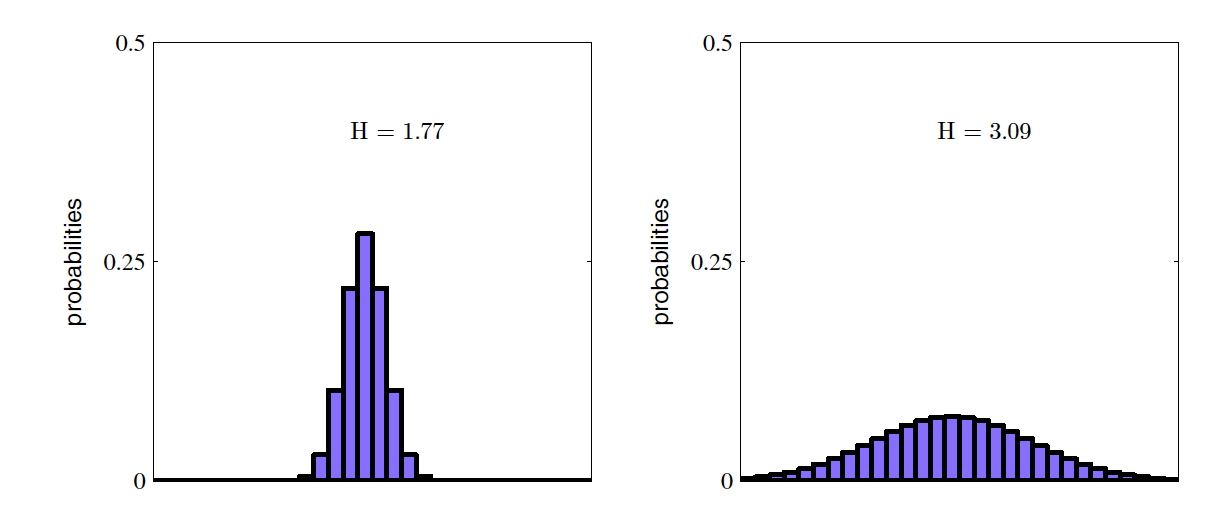

<center>图1.30 两个概率直方图中有着超过30个bins的，它的分布更广，相对的熵$H$也更大。最大熵产生自均匀分布，它的熵为$H=-\ln(1/30)=3.40$。</center>

我们可以扩展包含分布$p(x)$的熵定义到连续变量上。首先将$x$纷争宽度为$\Delta$大小的bins，假设$p(x)$是连续的，均值理论（Weisstein, 1999年）告诉我们，对于每个bin来说，必须存在一个值$x_i$，所以

$$\int_{i\Delta}^{(i+1)\Delta}p(x)dx = p(x_i)\Delta$$

现在我们通过分配任意落在$i_{\text{th}}$bins中$x$值来量化连续变量$x$值。那么观测值$x_i$的概率是$p(x_i)\Delta$。这里给出离散分布熵的形式

$$H_{\Delta} = - \sum_ip(x_i)\Delta\ln(p(x_i)\Delta) = - \sum_ip(x_i)\Delta\ln p(x_i) - \ln \Delta$$

这里我们有$\sum_ip(x_i)\Delta=1$，可以参照1.101。我们现在省略1.102公式中的右边第二项，然后考虑极限$\Delta \to 0$。1.102中的第一项在这个极限下$p(x)\ln p(x)$的积分如下

$$- \lim_{\Delta \to 0}\left\{\sum_ip(x_i)\Delta \ln p(x_i)\right\} = -\int p(x)\ln p(x)dx$$

右边的量我们叫做微分熵。我们看到离散和连续的熵不同地方就是在$\ln\Delta$，它其实就是极限$\Delta \to 0$的发散。它反映出这样一个事实就是要精准地反应一个连续变量则需要大量的比特。对于在多连续变量上的定义，使用向量$\mathbf{x}$表示，微分熵如下给出

$$H[\mathbf{x}]=-\int p(\mathbf{x})\ln p(\mathbf{x})d\mathbf{x}$$

在离散分布的例子中，我们看到最大熵是相应变量下的所有可能状态的等概率分布。让我们考虑连续变量的最大熵。为了更好地表达这个最大值，有必要先进行条件限制，并保留标准化限制。我们使用如下三个约束来最大化微分熵

$$\int_{-∞}^∞p(x)dx = 1$$

$$\int_{-∞}^∞xp(x)dx = \mu$$

$$\int_{-∞}^∞(x-\mu)p(x)dx = \sigma^2$$

条件最大化可以使用拉格朗日乘子来表示，继而可以使用如下函数来表示$p(x)$

$$\int_{-∞}^∞p(x) \ln p(x) dx + \lambda_1\left(\int_{-∞}^∞p(x)dx - 1\right) + \lambda_2\left(\int_{-∞}^∞xp(x)dx = \mu\right) + \lambda_3\left(\int_{-∞}^∞(x-\mu)p(x)dx - \sigma^2\right)$$

使用变分法，我们令函数的导数为0

$$p(x)=\text{exp}{-1+\lambda_1+\lambda_2x + \lambda_3(x-\mu)^2}$$

朗格朗日乘子可以通过将此结果带入三个约束条件得到，最终结果如下

$$p(x) = \frac{1}{(2\pi\sigma^2)^{1/2}}\text{exp}\left\{-\frac{(x-\mu)^2}{2\sigma^2}\right\}$$

所以最大化微分熵其实就是高斯。需要注意的是我们并没有限制在最大化熵时为非负。尽管如下，事实上结果分布也是非负的，我们看到这个条件并不是必须的。

如果我们评估高斯的微分熵，我们得到

$$H[x] = \frac{1}{2}\left\{1+\ln(2\pi\sigma^2)\right\}$$

因此我们看到熵会随着分布的扩大而增长，如，随着$\sigma^2$的增长。这个结果也证明了微分熵，不同于离散熵，它可以是负数，因为在1.110中的$H(x) < 0$，有$\sigma^2 < 1/(2\pi e)$。

假设我们有一对$\mathbf{x}$和$\mathbf{y}$表示的联合概率分布$p(\mathbf{x},\mathbf{y})$。如果已经知道$\mathbf{x}$的值，然后，指定$\mathbf{y}$对应所需的附加信息$-\ln p(\mathbf{y} \mid \mathbf{x})$。因此，指定$\mathbf{y}$所需的平均附加信息可以如下写出

$$H[\mathbf{x},\mathbf{y}]=-\iint p(\mathbf{y},\mathbf{x})\ln p(\mathbf{y} \mid \mathbf{x}) d\mathbf{y}d\mathbf{x}$$

它叫做在给定$\mathbf{x}$下$\mathbf{y}$的条件熵。很容易可以看到，使用乘法规则，条件熵满足如下关系

$$H[\mathbf{x},\mathbf{y}] = H[\mathbf{y} \mid \mathbf{x}] + H[\mathbf{x}]$$

这里$H[\mathbf{x},\mathbf{y}]$是$p(\mathbf{x},\mathbf{y})$的微分熵，$H[\mathbf{x}]$是边缘分布$p(\mathbf{x})$的微分熵。因此所以描述$\mathbf{x}$和$\mathbf{y}$的信息是单独描述$\mathbf{x}$的信息和给定$\mathbf{x}$得到$\mathbf{y}$的额外信息的和。

#### 1.6.1 相对熵和互信息

迄今为止在这章中，我们介绍了很多信息论的内容，包括熵的关键概念。现在我们将这些想法关联到模式识别中，考虑某些未知分布$p(\mathbf{x})$，假设我们使用一个近似分布$q(\mathbf{x})$来建模。如果我们使用$q(\mathbf{x})$来构造一个编码方案，以便将$\mathbf{x}$的值发送给一个接收器，然而，由于使用$q(\mathbf{x})$并不是真正的分布$p(\mathbf{x})$，我们需要指定$\mathbf{x}$的值（假设我们选择有效的编码方案）的平均额外信息量（以nats为单位）来表示，正如下式给出的：

$$\begin{align*}
\text{KL}(p \parallel q) &= -\int p(\mathbf{x}) \ln q(\mathbf{x})d\mathbf{x} - \left(-\int p(\mathbf{x}) \ln p(\mathbf{x})d\mathbf{x}\right) \\
&= - \int p(\mathbf{x})\ln \left\{\frac{q(\mathbf{x})}{p(\mathbf{x})}\right\} d \mathbf{x}
\end{align*}$$

这被称为相对熵，或叫做KL散度（Kullback和Leibler，1951年），在分布$p(\mathbf{x})$和$q(\mathbf{x})$之间。需要注意的是这不是一个对称量，也就是说有$\text{KL}(p \parallel q) \not\equiv \text{KL}(q \parallel p)$。

现在我们来证明KL散度满足$\text{KL}(p \parallel q) \ge 0$，且只有当$p(\mathbf{x}) = q(\mathbf{x})$时，它才为0。为了解决这个问题，我们需要介绍凸函数的内容。一个函数$f(x)$如果是凸的，那么函数上的每两个点连接成的直接都在函数之上，正如图1.31所示。在区间从$x=a$到$x=b$内的任意$x$值，可以写成$\lambda a + (1-\lambda)b$的形式，这里$0 \le \lambda \le 1$。在线段上的相应的点可以表示成$\lambda f(a) + (1-\lambda)f(b)$，它相应函数上的值为$f(\lambda a + (1-\lambda)b)$。凸函数的性质可以表示成

$$f(\lambda a + (1-\lambda)b) \le \lambda f(a) + (1-\lambda)f(b)$$

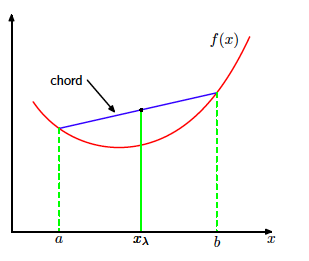

<center>图1.31 一个凸函数$f(x)$它的每两个点连接成的线段（蓝色表示）都在函数（红色表示）的上方。</center>

它相当于函数的二阶导处处可导。凸函数的例子有$x \ln x$，对于$x > 0$，和$x^2$。一个函数在$\lambda = 0$或$\lambda = 1$时，则具有强凸的性质。如果函数有相反的特性，那它的每个线段会在函数之下，我们叫它凹函数，它相应的定义为强凹。如果一个函数$f(x)$为凸函数，那么$-f(x)$为凹函数。

我们使用归纳法来证明，从1.114中我们得到一个凸函数满足

$$f\left(\sum_{i=1}^M\lambda_ix_i\right) \le \sum_{i=1}^M\lambda_if(x_i)$$

对于任意点$\{x_i\}$，这里有$\lambda_i \ge 0$和$\sum_i\lambda_i = 1$。1.115的结果叫做Jensen不等式。如果将$\lambda_i$解释为离散变量$x$取自$\{x_i\}$的概率分布，那么1.115可以写成

$$f(\mathbb{E}[x]) \le \mathbb{E}[f(x)]$$

这里$\mathbb{E}[\cdot]$表示的是期望。对于离散变量，Jensen不等式可以写成如下形式

$$f\left(\int \mathbf{x}p(\mathbf{x}d\mathbf{x})\right) \le \int f(\mathbf)p(\mathbf{x})d\mathbf{x}$$

我们可以应用1.117中的Jensen不等式到1.113中KL散度给出如下

$$\text{KL}(p \parallel q) = - \int p(\mathbf{x})\ln\left\{\frac{q(\mathbf{x})}{\mathbf{p(\mathbf{x})}}\right\}d\mathbf{x} \ge - \ln\int q(\mathbf{x})d\mathbf{x} = 0$$

我们已经知道$-\ln x$是凸函数的事实，以及标准化条件$\int q(\mathbf{x})d\mathbf{x} = 1$。事实上，$-\ln x$是严格的凸函数，因此，当且仅当对于所有$\mathbf{x}$，$q(\mathbf{x}) = p(\mathbf{x})$。因此我们可以使用KL散度来表示两分布$p(\mathbf{x})$和$q(\mathbf{x})$的差距。

我们可以看到数据压缩和密度评估（比如一个未知概率密度的建模问题），因为但我们知道真实分布时，大多数的有效压缩都会实现。当我们使用的分布不同于真实的那个，那我们必须有一个有效的少量编码，需要传输的平均额外信息至少要等于两个分布的KL散度。

假设数据是从未知分布$p(\mathbf{x})$中生成，这个分布就是我们希望要创建的模型。我们尝试使用残友参数分布$q(\mathbf{x} \mid \theta)$来近似这个分布，它由一组可调参数$\theta$来表示，比如一个多变量高斯。一种定义$\theta$的方法是最小化$p(\mathbf{x})$和$q(\mathbf{x})$之间的KL散度来得到$\theta$。因为我们不知道$p(\mathbf{x})$，所以不能直接这样做。假设，我们观测到一个有限训练点$\mathbf{x}_n$的有限集合，其中$n=1,\cdots, N$，采样自$p(\mathbf{x})$。那么期望代表的$p(\mathbf{x})$可以近似成一个这些有限点的和，使用1.35，所以

$$\text{KL}(p \parallel q) \simeq \sum_{n=1}^N\{-\ln q(\mathbf{x_n \mid \theta}) + \ln p(\mathbf{x_n})\}$$

1.119中的右边第二项是与$\theta$参数无关的，而第一项是使用训练集评估$\theta$分布$q(\mathbf{x} \mid \theta)$的负对数似然函数。因此我们可以看到最小化KL散度等价于最大化似然函数。

现在考虑两个变量$\mathbf{x}$和$\mathbf{y}$的集合的联合概率$p(\mathbf{x},\mathbf{y})$。如果变量集合是相互独立的，那么它们的联合分布可以因式分解成它们边缘值$p(\mathbf{x},\mathbf{y})=p(\mathbf{x})p(\mathbf{y})$的乘积。如果变量是非独立的，我们可以通过考虑联合概率与边缘值乘积的KL散度之间的相似程度，如下表示：

$$\begin{align*}\text{I}[\mathbf{x}, \mathbf{y}] &\equiv \text{KL}(p(\mathbf{x},\mathbf{y}) \parallel p(\mathbf{x})p(\mathbf{y})) \\
&= - \iint p(\mathbf{x},\mathbf{y})\ln \left(\frac{p(\mathbf{x})p(\mathbf{y})}{p(\mathbf{x},\mathbf{y})}\right)d\mathbf{x}d\mathbf{y}
\end{align*}$$

它叫做两个变量$\mathbf{x}$和$\mathbf{y}$之间的互信息。从KL散度的特性来看，我们可以看到当且仅当$\mathbf{x}$与$\mathbf{y}$独立时，$I(\mathbf{x},\mathbf{y}) \ge 0$。使用概率加和与乘积规则，我们看到互信息与条件熵之间的关系

$$\text{I}[\mathbf{x},\mathbf{y}] = \text{H}[\mathbf{x}] - \text{H}[\mathbf{x} \mid \mathbf{y}] = \text{H}[\mathbf{y}] - \text{H}[\mathbf{y} \mid \mathbf{x}]$$

因此我们可以将互信息视为在知道$\mathbf{y}$值下$\mathbf{x}$减少的量（反之亦然）。从贝叶斯推断来看，我们可以将$p(\mathbf{x})$视为$\mathbf{x}$的先验分布，而$p(\mathbf{x} \mid \mathbf{y})$视为在我们观测到新数据$\mathbf{y}$后的后验分布。互信息它表示的新观测$\mathbf{y}$下关于$\mathbf{x}$的减少。